## Numerical Integration Tool ##

**Will plot and integrate a function over the desired range, in addition to giving the point estimates and credible intervals**

Developed for the problems at [Probability and Statistics Problem Solve](https://probabilityandstatsproblemsolve.wordpress.com/2018/10/29/practice-problem-set-2-poisson-and-gamma/) <p>
    
Despite the ads, I find [Integral Calculator](https://www.integral-calculator.com), invaluable for an analytic solution, but sometimes this (where it exists) can be horrid - try the example below! <p>
    
So I wrote this - nothing grounbreaking, but it doesn't lock you into a single function - it's reusable with any function of your choice. 

**Packages**

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

**Plot Set-Up**

In [164]:
font = 14
def spines(width,height,setup):
    if setup == 'y':
        plt.rcParams.update({'font.size': font})
        plt.figure(figsize = (width,height))
        ax = plt.gca();
    plt.setp(ax.spines.values(), linewidth=2)
    ax.tick_params(direction='in', pad = 7,length=6, width=1.5, which='major',right=True,top=True)
    ax.tick_params(direction='in', pad = 7,length=3, width=1.5, which='minor',right=True,top=True)
    return ax

**The Engine**

In [165]:
npts = 10000 # INCREASE FOR HIGHER ACCURCAY

def disp(y,lim1,lim2):
    ax = spines(6,4,'y')
    plt.plot(x, y, '-', c = 'r', lw=3)
    if lim2 > lim1:
        plt.fill_between(x,y,0,where = (x <= lim2) & (x >= lim1), color='silver')

    dx = (r2 - r1)/npts; dA = y*dx
    A = dA.cumsum(); dAx = x*y*dx; dAx2 = (x**2)*y*dx
    Ax = dAx.cumsum(); Ax2 = dAx2.cumsum()
    
    plt.xlabel('$x$'); plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()
    plt.close()
    return A,y,Ax,Ax2

**Input**

In [187]:
R = input("Range of plot, e.g. 0,100: ")

Range of plot, e.g. 0,100: 0,100


In [188]:
r = R.split(","); r1 = float(r[0]);  r2 = float(r[1])
x = np.linspace(r1,r2,npts+1)

**Replace the formula in the following line with yours in a python friendly format, e.g. formula = x\*\*2**

In [189]:
formula = (1/24)*(1/5)**5*(x**4)*(np.exp(-x/5))

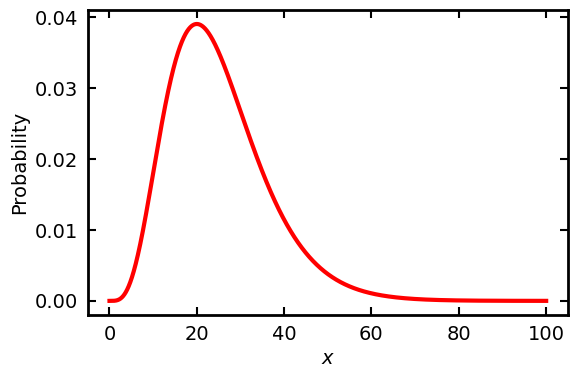

In [191]:
x = np.linspace(r1,r2,npts+1)
A,y,Ax,Ax2 = disp(formula,0,0)

Change the range of the plot above if this doesn't suit

**Integration**

In [192]:
def integrate(lim1,lim2):
    index1 = list([i for i,x in enumerate(x) if x >=lim1]);
    index2 = list([i for i,x in enumerate(x) if x <= lim2]); #print(index1)
    i1 = index1[0]; i2 = index2[-1]; 
    
    print('Area over %1.1f to %1.1f is %1.4f ' %(lim1,lim2,A[i2] - A[i1]))
    print('Remaining area is  %1.4f ' %(1- (A[i2] - A[i1])))

In [193]:
L = input("Limits of integration, e.g. 0,20: ")

Limits of integration, e.g. 0,20: 0,20


Area over 0.0 to 20.0 is 0.3714 
Remaining area is  0.6286 


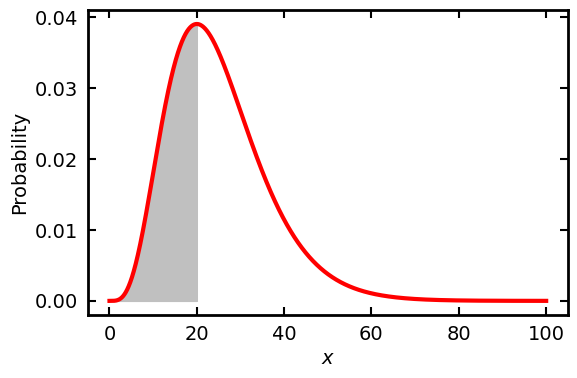

In [194]:
l = L.split(","); lim1 = float(l[0]);  lim2 = float(l[1])
integrate(lim1,lim2)
A,y,Ax,Ax2 = disp(formula,lim1,lim2)

In [195]:
mean = Ax[-1]
var = Ax2[-1] - mean**2
max_index = np.argmax(y)
index1 = list([i for i,x in enumerate(A) if x <= 0.5]);
i1 = index1[-1]

**Point Estimates**

In [197]:
print(" - The MAP (mode) is %1.4f" %(x[max_index]))
print(" - The mean is %1.4f" %(Ax[-1]))
print(" - The median is %1.4f" %(x[i1]))
print(" - The variance is %1.3f, giving SD = %1.3f" %(var,var**0.5))

 - The MAP (mode) is 20.0000
 - The mean is 24.9982
 - The median is 23.3400
 - The variance is 124.899, giving SD = 11.176


**Credible Interval**

In [198]:
CL = float(input("Credible level in percent [e.g. 95]: "))

Credible level in percent [e.g. 95]: 95


In [199]:
p = (100 - CL)*0.5/100
index1 = list([i for i,x in enumerate(A) if x < p]); 
index2 = list([i for i,x in enumerate(A) if x > 1-p])
i1 = index1[-1]; i2 = index2[0]
print("%1.2f%% of the data are between %1.4f and %1.4f" %(CL,x[i1],x[i2]))

95.00% of the data are between 8.1100 and 51.2100


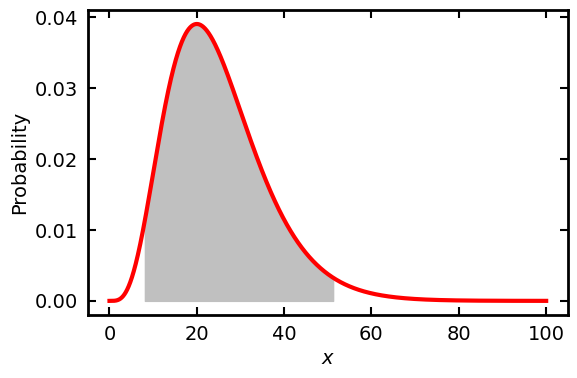

In [200]:
A,y,Ax,Ax2 = disp(formula,x[i1],x[i2])